In [10]:
import pandas as pd
# Đọc dữ liệu từ file CSV (có thể thay bằng file của bạn)
#df = pd.read_csv('VCB_hose.csv')
file_path = r'D:\DeTaiNam2024\SoLieu\KinhTeViMo\cpi.csv'
df = pd.read_csv(file_path)
# Kiểm tra tiêu đề các cột
df.head()


,tg,t,cpi
0,0,Jan-95,103.8
1,1,Feb-95,103.4
2,2,Mar-95,100.2
3,3,Apr-95,101.0
4,4,May-95,101.8


In [2]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [12]:
from sklearn.model_selection import train_test_split
import time
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Tạo các đặc trưng (ở đây ta chỉ sử dụng giá hôm trước và khối lượng giao dịch)
df['cpi_lag1'] = df['cpi'].shift(1)


# Loại bỏ các hàng chứa giá trị NaN
df.dropna(inplace=True)

# Chọn các đặc trưng (X) và mục tiêu (Y)
X = df[['cpi_lag1']]
Y = df['cpi']


# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# Bắt đầu tính thời gian huấn luyện
start_time = time.time()
# Tạo mô hình XGBoost cho bài toán phân loại
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05)

# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train, Y_train,  eval_set=[(X_test, Y_test)], verbose=False)
# Kết thúc tính thời gian huấn luyện
train_time_cls = time.time() - start_time
print(f'Thời gian huấn luyện mô hình phân loại: {train_time_cls:.4f} giây')

# Bắt đầu tính thời gian dự đoán
start_time = time.time()

# Dự đoán trên tập kiểm tra
Y_pred = model.predict(X_test)
# Kết thúc tính thời gian huấn luyện
train_time_cls = time.time() - start_time
print(f'Thời gian huấn luyện mô hình hồi qui: {train_time_cls:.4f} giây')

# Bắt đầu tính thời gian dự đoán
start_time = time.time()
#Đánh giá mô hình
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2: {r2}")


Thời gian huấn luyện mô hình phân loại: 1.2499 giây
Thời gian huấn luyện mô hình hồi qui: 0.0092 giây
Mean Squared Error: 0.866983085586254
R^2: -0.6420978391234826


In [13]:
import numpy as np
mse1=np.mean(np.square(Y_pred - Y_test))
print('MSE=', mse1)
mean_error_percent1 = np.mean(np.abs((Y_pred - Y_test) / Y_test))
accuracy1 = 1 - mean_error_percent1
print('Accuracy=', accuracy1)
print('mean_error_percent=', mean_error_percent1)

MSE= 0.8669830855862544
Accuracy= 0.9940050120619924
mean_error_percent= 0.00599498793800752


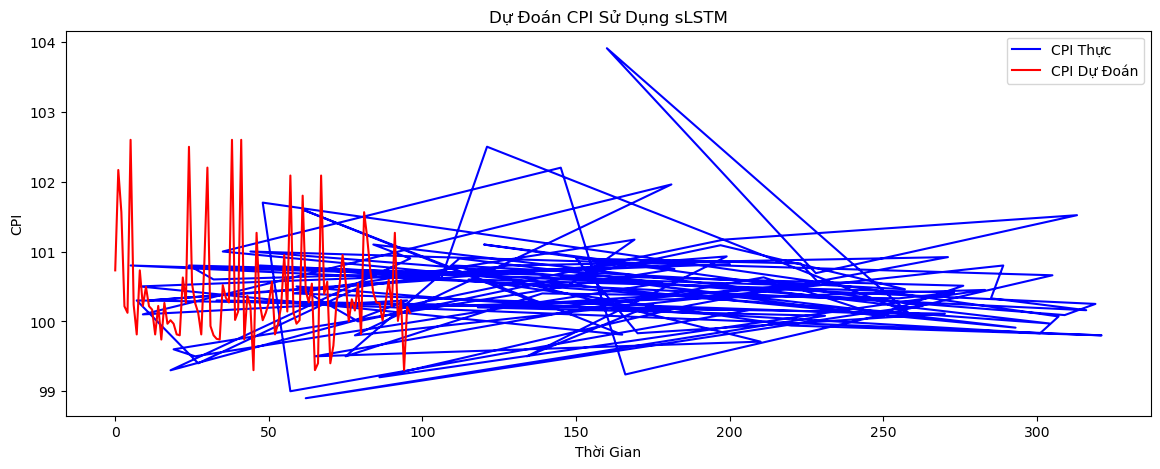

In [15]:
# Vẽ đồ thị so sánh giá thực và giá dự đoán
plt.figure(figsize=(14, 5))
plt.plot(Y_test, color='blue', label='CPI Thực')
plt.plot(Y_pred, color='red', label='CPI Dự Đoán')
plt.title('Dự Đoán CPI Sử Dụng sLSTM')
plt.xlabel('Thời Gian')
plt.ylabel('CPI')
plt.legend()
plt.show()


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
import time
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
file_path = r'D:\DeTaiNam2024\SoLieu\KinhTeViMo\GDP.csv'
df = pd.read_csv(file_path)
# Tạo các đặc trưng (ở đây ta chỉ sử dụng giá hôm trước và khối lượng giao dịch)
df['GDP_lag1'] = df['GDP_VN'].shift(1)


# Loại bỏ các hàng chứa giá trị NaN
df.dropna(inplace=True)

# Chọn các đặc trưng (X) và mục tiêu (Y)
X = df[['GDP_lag1']]
Y = df['GDP_VN']


# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
# Bắt đầu tính thời gian huấn luyện
start_time = time.time()
# Tạo mô hình XGBoost cho bài toán phân loại
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05)

# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train, Y_train,  eval_set=[(X_test, Y_test)], verbose=False)
# Kết thúc tính thời gian huấn luyện
train_time_cls = time.time() - start_time
print(f'Thời gian huấn luyện mô hình phân loại: {train_time_cls:.4f} giây')

# Bắt đầu tính thời gian dự đoán
start_time = time.time()

# Dự đoán trên tập kiểm tra
Y_pred = model.predict(X_test)
# Kết thúc tính thời gian huấn luyện
train_time_cls = time.time() - start_time
print(f'Thời gian huấn luyện mô hình hồi qui: {train_time_cls:.4f} giây')

# Bắt đầu tính thời gian dự đoán
start_time = time.time()
#Đánh giá mô hình
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2: {r2}")

mse1=np.mean(np.square(Y_pred - Y_test))
print('MSE=', mse1)
mean_error_percent1 = np.mean(np.abs((Y_pred - Y_test) / Y_test))
accuracy1 = 1 - mean_error_percent1
print('Accuracy=', accuracy1)
print('mean_error_percent=', mean_error_percent1)

Thời gian huấn luyện mô hình phân loại: 7.5017 giây
Thời gian huấn luyện mô hình hồi qui: 0.0176 giây
Mean Squared Error: 1.872077758817489e+20
R^2: 0.9712533702155882
MSE= 1.872077758817489e+20
Accuracy= 0.9145771452979243
mean_error_percent= 0.08542285470207561


Thời gian huấn luyện mô hình hồi quy: 1.1668 giây
Thời gian dự đoán: 0.0101 giây
Mean Squared Error: 0.7197776548932734
R^2: -0.5149678654563783
MSE= 0.7197776548932734
Accuracy= 0.9940432865708044
mean_error_percent= 0.005956713429195587


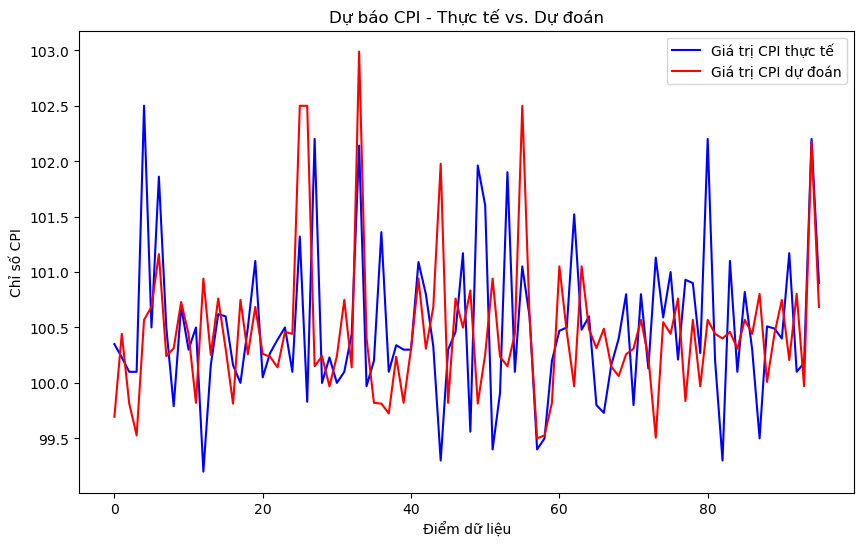

In [17]:
import pandas as pd
import time
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Giả định df là DataFrame có chứa dữ liệu CPI và đã được load vào
# Tạo các đặc trưng (ở đây ta chỉ sử dụng giá CPI của ngày trước)
df['cpi_lag1'] = df['cpi'].shift(1)

# Loại bỏ các hàng chứa giá trị NaN
df.dropna(inplace=True)

# Chọn các đặc trưng (X) và mục tiêu (Y)
X = df[['cpi_lag1']]
Y = df['cpi']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Bắt đầu tính thời gian huấn luyện
start_time = time.time()

# Tạo mô hình XGBoost cho bài toán hồi quy
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05)

# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train, Y_train, eval_set=[(X_test, Y_test)], verbose=False)

# Kết thúc tính thời gian huấn luyện
train_time = time.time() - start_time
print(f'Thời gian huấn luyện mô hình hồi quy: {train_time:.4f} giây')

# Bắt đầu tính thời gian dự đoán
start_time = time.time()

# Dự đoán trên tập kiểm tra
Y_pred = model.predict(X_test)

# Kết thúc tính thời gian dự đoán
predict_time = time.time() - start_time
print(f'Thời gian dự đoán: {predict_time:.4f} giây')

# Đánh giá mô hình
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2: {r2}")
mse1=np.mean(np.square(Y_pred - Y_test))
print('MSE=', mse1)
mean_error_percent1 = np.mean(np.abs((Y_pred - Y_test) / Y_test))
accuracy1 = 1 - mean_error_percent1
print('Accuracy=', accuracy1)
print('mean_error_percent=', mean_error_percent1)
# Vẽ đồ thị dự đoán so với thực tế
plt.figure(figsize=(10, 6))
plt.plot(Y_test.values, label="Giá trị CPI thực tế", color='blue')
plt.plot(Y_pred, label="Giá trị CPI dự đoán", color='red')
plt.legend()
plt.title("Dự báo CPI - Thực tế vs. Dự đoán")
plt.xlabel("Điểm dữ liệu")
plt.ylabel("Chỉ số CPI")
plt.show()


Thời gian huấn luyện mô hình hồi quy: 0.9707 giây
Thời gian dự đoán: 0.0050 giây
Mean Squared Error: 1.872077758817489e+20
R^2: 0.9712533702155882
MSE= 1.872077758817489e+20
Accuracy= 0.9145771452979243
mean_error_percent= 0.08542285470207561


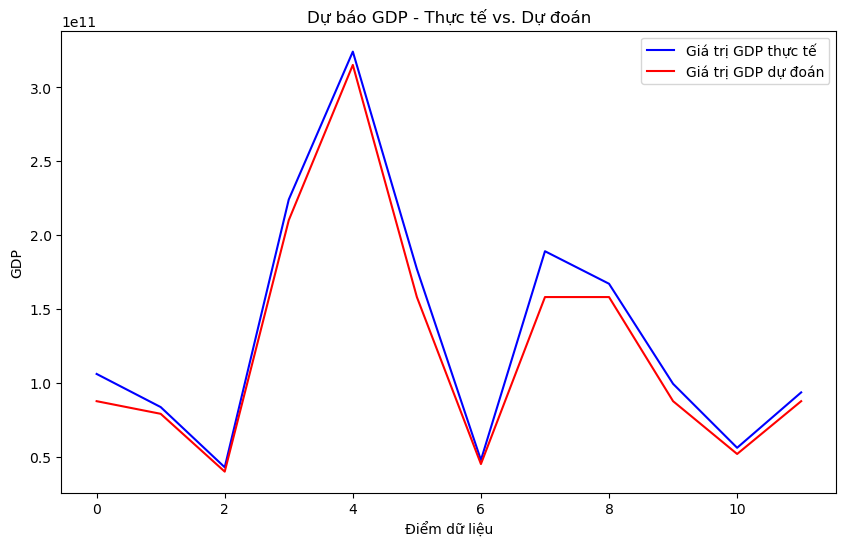

In [20]:
import pandas as pd
import time
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
file_path = r'D:\DeTaiNam2024\SoLieu\KinhTeViMo\GDP.csv'
df = pd.read_csv(file_path)
# Tạo các đặc trưng (ở đây ta chỉ sử dụng giá hôm trước và khối lượng giao dịch)
df['GDP_lag1'] = df['GDP_VN'].shift(1)


# Loại bỏ các hàng chứa giá trị NaN
df.dropna(inplace=True)

# Chọn các đặc trưng (X) và mục tiêu (Y)
X = df[['GDP_lag1']]
Y = df['GDP_VN']


# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Bắt đầu tính thời gian huấn luyện
start_time = time.time()

# Tạo mô hình XGBoost cho bài toán hồi quy
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05)

# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train, Y_train, eval_set=[(X_test, Y_test)], verbose=False)

# Kết thúc tính thời gian huấn luyện
train_time = time.time() - start_time
print(f'Thời gian huấn luyện mô hình hồi quy: {train_time:.4f} giây')

# Bắt đầu tính thời gian dự đoán
start_time = time.time()

# Dự đoán trên tập kiểm tra
Y_pred = model.predict(X_test)

# Kết thúc tính thời gian dự đoán
predict_time = time.time() - start_time
print(f'Thời gian dự đoán: {predict_time:.4f} giây')

# Đánh giá mô hình
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2: {r2}")
mse1=np.mean(np.square(Y_pred - Y_test))
print('MSE=', mse1)
mean_error_percent1 = np.mean(np.abs((Y_pred - Y_test) / Y_test))
accuracy1 = 1 - mean_error_percent1
print('Accuracy=', accuracy1)
print('mean_error_percent=', mean_error_percent1)
# Vẽ đồ thị dự đoán so với thực tế
plt.figure(figsize=(10, 6))
plt.plot(Y_test.values, label="Giá trị GDP thực tế", color='blue')
plt.plot(Y_pred, label="Giá trị GDP dự đoán", color='red')
plt.legend()
plt.title("Dự báo GDP - Thực tế vs. Dự đoán")
plt.xlabel("Điểm dữ liệu")
plt.ylabel("GDP")
plt.show()


Thời gian huấn luyện mô hình hồi quy: 1.0934 giây
Thời gian dự đoán: 0.0073 giây
Mean Squared Error: 241171.01661811283
R^2: 0.9872346638138604
MSE= 241171.01661811283
Accuracy= 0.9735689138779496
mean_error_percent= 0.02643108612205031


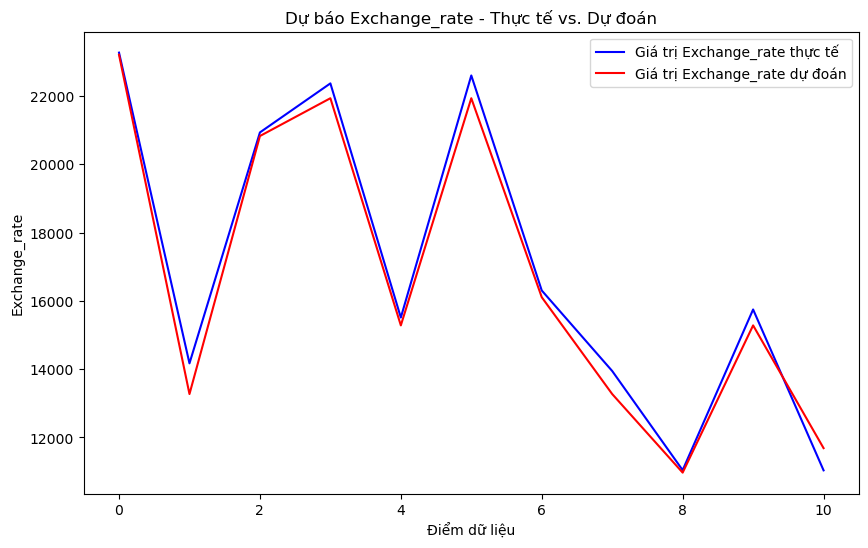

In [21]:
import pandas as pd
import time
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
file_path = r'D:\DeTaiNam2024\SoLieu\KinhTeViMo\exchange_rate.csv'
df = pd.read_csv(file_path)
# Tạo các đặc trưng (ở đây ta chỉ sử dụng giá hôm trước và khối lượng giao dịch)
df['exchange_lag1'] = df['exchange_rate'].shift(1)


# Loại bỏ các hàng chứa giá trị NaN
df.dropna(inplace=True)

# Chọn các đặc trưng (X) và mục tiêu (Y)
X = df[['exchange_lag1']]
Y = df['exchange_rate']


# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Bắt đầu tính thời gian huấn luyện
start_time = time.time()

# Tạo mô hình XGBoost cho bài toán hồi quy
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05)

# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train, Y_train, eval_set=[(X_test, Y_test)], verbose=False)

# Kết thúc tính thời gian huấn luyện
train_time = time.time() - start_time
print(f'Thời gian huấn luyện mô hình hồi quy: {train_time:.4f} giây')

# Bắt đầu tính thời gian dự đoán
start_time = time.time()

# Dự đoán trên tập kiểm tra
Y_pred = model.predict(X_test)

# Kết thúc tính thời gian dự đoán
predict_time = time.time() - start_time
print(f'Thời gian dự đoán: {predict_time:.4f} giây')

# Đánh giá mô hình
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2: {r2}")
mse1=np.mean(np.square(Y_pred - Y_test))
print('MSE=', mse1)
mean_error_percent1 = np.mean(np.abs((Y_pred - Y_test) / Y_test))
accuracy1 = 1 - mean_error_percent1
print('Accuracy=', accuracy1)
print('mean_error_percent=', mean_error_percent1)
# Vẽ đồ thị dự đoán so với thực tế
plt.figure(figsize=(10, 6))
plt.plot(Y_test.values, label="Giá trị Exchange_rate thực tế", color='blue')
plt.plot(Y_pred, label="Giá trị Exchange_rate dự đoán", color='red')
plt.legend()
plt.title("Dự báo Exchange_rate - Thực tế vs. Dự đoán")
plt.xlabel("Điểm dữ liệu")
plt.ylabel("Exchange_rate")
plt.show()
